# 1D SEI Model Post-processing

This notebook allows you to construct plots from your output data.

## Identify the data location
Start by naming the file(s) you want to process. 
This is the name of the folder inside the 'output' folder where the results are saved.

In [3]:
datafolder = 'BEST_detailed_model_fitting2019-08-16_130341'

eps_min = 0.025
fs = 12

previous = 0

## Now we'll load the data:

In [4]:
%matplotlib notebook  

import os, csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# If you've run this block before, re-set chdir back to its original value, first:
if previous:
    os.chdir(cwd)
    
# Get the current working directory:
cwd = os.getcwd()
previous = 1
os.chdir(cwd+'/output/'+datafolder)

data = pd.read_csv('solution.csv',header=0)

# Get variable names:
f = open('names.csv','r')
names = csv.reader(f)
data_names = data.index.to_list()

i=0
for row in names:
    data_names[i]=(str('\t'.join(row)))
    i+=1

f.close()

data.index = data_names

from sei_1d_init import N_y, dy, nvars_node
#elif homogeneous:
#    from sei_1d_init import dy, nvars_node
# Transpose the data so that each row is for a time, and each column represents a variable:
data = data.T
data


     Cantera phases created. 

The species in the electrolyte are:
bulk[C3H4O3]
bulk[C4H8O3]
LipElyt
PF6mElyt
C2H6O2(el)
H2O(el)
C2H4
CO
CO2


The species in the SEI are:
LEDC[SEI]
Li2CO3[SEI]
Li2O[SEI]


phi SEI  phi elyte       eps SEI  LEDC[SEI]  \
0.000000000000000000e+00  1.000000        0.0  1.000000e-06   0.000013   
3.480911254882812415e-06  1.000000        0.0  9.997174e-07   0.000013   
6.961822509765624831e-06  1.000000        0.0  9.994349e-07   0.000013   
1.392364501953124966e-05  1.000000        0.0  9.988707e-07   0.000013   
2.784729003906249932e-05  1.000000        0.0  9.977451e-07   0.000013   
...                            ...        ...           ...        ...   
3.595167103463410513e+03  0.500026        0.0  1.000000e+00   1.868119   
3.611576442135784873e+03  0.500026        0.0  1.000000e+00   1.868119   
3.626344846940921798e+03  0.500026        0.0  1.000000e+00   1.868119   
3.641113251746058722e+03  0.500026        0.0  1.000000e+00   1.868119   
3.650000000000000000e+03  0.500026        0.0  1.000000e+00   1.868119   

                          Li2CO3[SEI]  Li2O[SEI]  bulk[C3H4O3]  bulk[C4H8O3]  \
0.000000000000000000e+00     0.000002   0.000002      8.008772      5.233424   
3.480911254882812415e-06     0.000002   0.000002      8.008772      5.233424   
6.961822509765624831e-06     0.000002   0.000002      8.008772      5.233424   
1.392364501953124966e-05     0.000002   0.000002      8.008772      5.233424   
2.784729003906249932e-05     0.000002   0.000002      8.008772      5.233424   
...                               ...        ...           ...           ...   
3.595167103463410513e+03     7.227382  45.627408      8.008772      5.233424   
3.611576442135784873e+03     7.227382  45.627408      8.008772      5.233424   
3.626344846940921798e+03     7.227382  45.627408      8.008772      5.233424   
3.641113251746058722e+03     7.227382  45.627408      8.008772      5.233424   
3.650000000000000000e+03     7.227382  45.627408      8.008772      5.233424   

                           LipElyt  PF6mElyt  ...  Li2O[SEI]  bulk[C3H4O3]  \
0.000000000000000000e+00  1.078104  1.078104  ...   0.000002      8.008772   
3.480911254882812415e-06  1.078104  1.078104  ...   0.000002      8.008772   
6.961822509765624831e-06  1.078104  1.078104  ...   0.000002      8.008772   
1.392364501953124966e-05  1.078104  1.078104  ...   0.000002      8.008772   
2.784729003906249932e-05  1.078104  1.078104  ...   0.000002      8.008772   
...                            ...       ...  ...        ...           ...   
3.595167103463410513e+03  1.078104  1.078104  ...   0.000002      8.008772   
3.611576442135784873e+03  1.078104  1.078104  ...   0.000002      8.008772   
3.626344846940921798e+03  1.078104  1.078104  ...   0.000002      8.008772   
3.641113251746058722e+03  1.078104  1.078104  ...   0.000002      8.008772   
3.650000000000000000e+03  1.078104  1.078104  ...   0.000002      8.008772   

                          bulk[C4H8O3]   LipElyt  PF6mElyt  C2H6O2(el)  \
0.000000000000000000e+00      5.233424  1.078104  1.078104         0.0   
3.480911254882812415e-06      5.233424  1.078104  1.078104         0.0   
6.961822509765624831e-06      5.233424  1.078104  1.078104         0.0   
1.392364501953124966e-05      5.233424  1.078104  1.078104         0.0   
2.784729003906249932e-05      5.233424  1.078104  1.078104         0.0   
...                                ...       ...       ...         ...   
3.595167103463410513e+03      5.233424  1.078104  1.078104         0.0   
3.611576442135784873e+03      5.233424  1.078104  1.078104         0.0   
3.626344846940921798e+03      5.233424  1.078104  1.078104         0.0   
3.641113251746058722e+03      5.233424  1.078104  1.078104         0.0   
3.650000000000000000e+03      5.233424  1.078104  1.078104         0.0   

                          H2O(el)  C2H4   CO  CO2  
0.000000000000000000e+00  0.00154   0.0  0.0  0.0  
3.480911254882812415e-06  0.00154   0.0  0.0  0.0  
6.961822509765624831e-06  0.00154   0.0  0.0  0.0  
1.392364501953124966e-05  0.00154   0.0  0.0  0.0  
2.784729003906249932e-05  0.00154   0.0  0.0  0.0  
...                           ...   ...

## Plot SEI thickness vs. time.

We start by finding the volumes at each time where $\varepsilon_{\rm SEI}$ is greater than a user-defined minimum. The SEI thickness is equal to the summed thickness of all but the final volume $\left(n-1\right)\Delta y$, plus a fractional thickness $\varepsilon_{\rm SEI}(t)\Delta y$ of the final such volume at time $t$:

<IPython.core.display.Javascript object>


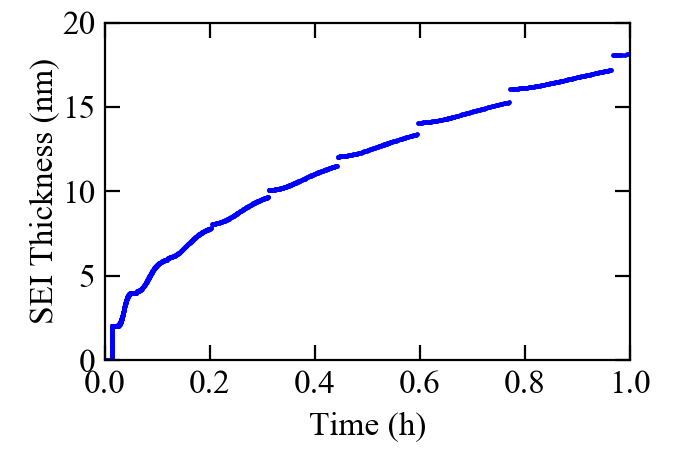

In [6]:
def thickness_calc(eps_min):
    thickness = []
    eps_SEI = data['eps SEI']

    for j,eps in eps_SEI.iterrows():
        grown = []
        growth = eps[eps['eps SEI']>eps_min]
        if growth.empty:
            thickness.append(0.)
        else:
            #print(growth.iloc[-1])
            thickness.append((growth.count()-1.+growth.iloc[-1])*dy)
    return thickness   
    

t = np.asarray(data.index[:],dtype=float)
y = np.asarray(thickness_calc(eps_min))


fig = plt.figure()
ax = fig.add_axes([0.15,0.2,0.75,0.75])
fig.set_size_inches((3.5,2.25))

plt.plot(t/3600,y*1e9,'b.',markersize=1.50)
plt.xlim([0,1.0])
plt.ylim([0,20])
plt.xlabel('Time (s)')
plt.ylabel('SEI thickness (nm)')
#plt.xticks(np.array([0.,1000.,2000.,3000.,4000.]))


font = plt.matplotlib.font_manager.FontProperties(family='Times New Roman',size=fs)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname('Times New Roman')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname('Times New Roman')

ax.tick_params(axis="y",direction="in",length=5.5,right=True)
ax.tick_params(axis="x",direction="in",length=5.5,top=True)
ax.set_ylabel('SEI Thickness (nm)',fontsize=fs,family='Times New Roman',labelpad = 1.)
ax.set_xlabel('Time (h)',fontsize=fs,family='Times New Roman')
plt.savefig('Thickness_vs_time.pdf',format='pdf',dpi=350)

In [4]:
# Set cwd back to original value
os.chdir(cwd)